In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os

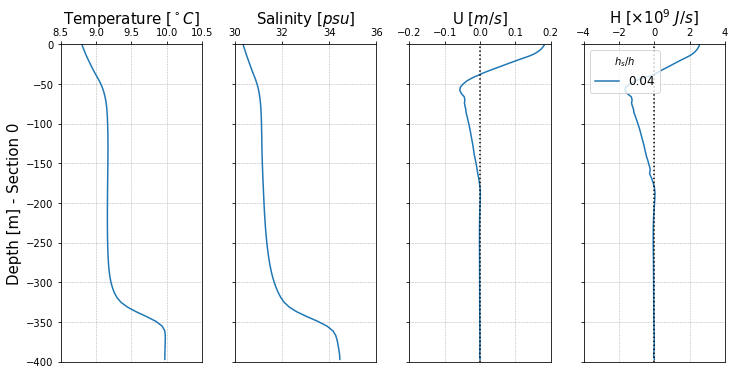

In [8]:
datapath = '/work/oceans/wbao/MITgcm_results/iceplume/1_BaseCase'
case = np.array([1]) # Sill depth
hsr = np.array([0.04, 0.06, 0.08, 0.1, 0.12, 1])
gf, sw, se = 6, 120, 235 # index for cross-fjord sections 0, 1, 2

Cp = 3994  # Specific heat content J/kg/C
rho = 999.8 # Density

# Four-panel plot
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,sharey=True, figsize=(10,5))
fig1.tight_layout()

for i in range(len(case)):

    file01 = xr.open_dataset(datapath+'/state_'+str(format(case[i],'03d')) + '.nc')
    file02 = xr.open_dataset(datapath+'/Adv_' + str(format(case[i],'03d')) + '.nc')
    file1 = file01.isel(T=~file01.get_index("T").duplicated())
    file2 = file02.isel(T=~file02.get_index("T").duplicated())
    state = file1.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,46), T=range(90,121))
    adv = file2.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,46), T=range(89,120))
 
    depth = state.Z.data
    uzx = state.U.data.mean(axis=(0,2))
    tzx = state.Temp.data.mean(axis=(0,2))
    szx = state.S.data.mean(axis=(0,2))
    advzx = adv.ADVx_TH.data.mean(axis=(0,2)) * Cp * rho
    
    temp = tzx[:,sw]
    temp[temp==0] = 'nan'
    sal = szx[:,sw]
    sal[sal==0] = 'nan'
    u = uzx[:,sw]
    advh = advzx[:,sw]
    
    

    # Temperature
    ax1.plot(temp,depth,'-',lw=1.5)
    #ax1.legend(loc='best', fontsize=12)
    ax1.set_ylabel(r'Depth [m] - Section 0',size = 15)
    ax1.set_ylim(-400,0)
    ax1.set_xlim(8.5,10.5)
    ax1.set_xlabel(r'Temperature [$^\circ C$]', size = 15)
    ax1.xaxis.set_label_position('top') # this moves the label to the top
    ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
    ax1.grid(ls='--', lw=.5)
    
    # Salinity
    ax2.plot(sal,depth,'-',lw=1.5)
    #ax2.legend(fontsize=15)
    ax2.set_xlabel(r'Salinity [$psu$]', size = 15)
    ax2.set_xlim(30,36)
    ax2.set_ylim(-400,0)
    ax2.xaxis.set_label_position('top') # this moves the label to the top
    ax2.xaxis.set_ticks_position('top') # this moves the ticks to the top
    #ax2.yaxis.set_visible(False) # This erases the y ticks
    ax2.grid(ls='--', lw=.5)
    
    # Horizontal velocity
    ax3.plot(u,depth,'-',lw=1.5)
    #ax3.legend(fontsize=15)
    ax3.axvline(x=0,color='k',linestyle=':')
    ax3.set_xlim(-0.2,0.2)
    ax3.set_ylim(-400,0)
    ax3.set_xlabel(r'U [$m/s$]', size = 15)
    ax3.xaxis.set_label_position('top') # this moves the label to the top
    ax3.xaxis.set_ticks_position('top') # this moves the ticks to the top
    #ax3.yaxis.set_visible(False) # This erases the y ticks
    ax3.grid(ls='--', lw=.5)
    
    # Horizontal advective heat flux
    ax4.plot(advh/1e9,depth,'-',lw=1.5,label=str(hsr[i]))
    ax4.axvline(x=0,color='k',linestyle=':')
    ax4.legend(title='$h_s/h$',loc='best',fontsize=12)
    ax4.set_xlabel(r'H [$\times 10^9~J/s$]', size = 15)
    ax4.set_xlim(-4,4)
    ax4.set_ylim(-400,0)    
    ax4.xaxis.set_label_position('top') # this moves the label to the top
    ax4.xaxis.set_ticks_position('top') # this moves the ticks to the top
    #ax4.yaxis.set_visible(False) # This erases the y ticks
    ax4.grid(ls='--', lw=.5)


In [9]:
u

array([ 1.81970209e-01,  1.78898454e-01,  1.75197318e-01,  1.70485079e-01,
        1.64647385e-01,  1.57494396e-01,  1.48643985e-01,  1.37591571e-01,
        1.24800652e-01,  1.11838669e-01,  9.93202925e-02,  8.69547054e-02,
        7.48554990e-02,  6.29170910e-02,  5.08029275e-02,  3.83587070e-02,
        2.63446998e-02,  1.49652064e-02,  4.11874382e-03, -5.36426343e-03,
       -2.09008455e-02, -3.72977331e-02, -4.79379557e-02, -5.58086894e-02,
       -5.71434386e-02, -5.25518805e-02, -4.46007960e-02, -4.29153889e-02,
       -4.40183468e-02, -4.22153212e-02, -4.01564464e-02, -3.93096134e-02,
       -3.69688570e-02, -3.49107981e-02, -3.28395665e-02, -3.07280477e-02,
       -2.88504567e-02, -2.71383375e-02, -2.55147144e-02, -2.39123609e-02,
       -2.22250931e-02, -2.06016600e-02, -1.91125292e-02, -1.79170817e-02,
       -1.63842440e-02, -1.48431072e-02, -1.27743287e-02, -1.11726373e-02,
       -9.31887049e-03, -8.08091369e-03, -6.22596592e-03, -3.49153625e-03,
       -1.37816824e-03,  

In [21]:
fig_path ="/home/1959/Jupyter_Figs/FjordModeling/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
fig1.savefig(fig_path + '/profile_section0.png', dpi=300, bbox_inches='tight') 

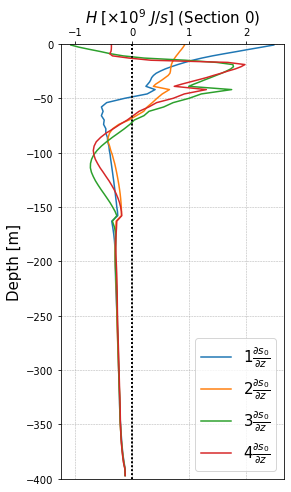

In [10]:
datapath = '/work/oceans/wbao/MITgcm_results/iceplume/Sal_Linear_minhs'
case = np.array([4, 3, 2, 1]) # Sill depth
gf, sw, se = 6, 120, 235 # index for cross-fjord sections 0, 1, 2

Cp = 3994  # Specific heat content J/kg/C
rho = 999.8 # Density

fig2 = plt.figure(figsize=(4,8))
fig2.tight_layout()  
ax1 = fig2.add_subplot(111)

for i in range(len(case)):

    file01 = xr.open_dataset(datapath+'/state_'+str(format(case[i],'03d')) + '.nc')
    file02 = xr.open_dataset(datapath+'/Adv_' + str(format(case[i],'03d')) + '.nc')
    file1 = file01.isel(T=~file01.get_index("T").duplicated())
    file2 = file02.isel(T=~file02.get_index("T").duplicated())
    state = file1.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,46), T=range(90,121))
    adv = file2.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,46), T=range(89,120))
 
    depth = state.Z.data
    uzx = state.U.data.mean(axis=(0,2))
    tzx = state.Temp.data.mean(axis=(0,2))
    szx = state.S.data.mean(axis=(0,2))
    advzx = adv.ADVx_TH.data.mean(axis=(0,2)) * Cp * rho
    
    temp = tzx[:,gf]
    temp[temp==0] = 'nan'
    sal = szx[:,gf]
    sal[sal==0] = 'nan'
    u = uzx[:,gf]
    advh = advzx[:,gf]
    
    
    # Horizontal advective heat flux
    ax1.plot(advh/1e9,depth,'-',lw=1.5,label=str(i+1)+r'$\frac{\partial s_0}{\partial z}$')
    ax1.axvline(x=0,color='k',linestyle=':')
    ax1.legend(loc='best',fontsize=15)
    ax1.set_xlabel(r'$H\;[\times 10^9~J/s]$ (Section 0)', size = 15)
    ax1.set_ylabel(r'Depth [m]',size = 15)
    #ax4.set_xlim(-4,4)
    ax1.set_ylim(-400,0)    
    ax1.xaxis.set_label_position('top') # this moves the label to the top
    ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
    #ax4.yaxis.set_visible(False) # This erases the y ticks
    ax1.grid(ls='--', lw=.5)


In [13]:
def U_zprof(datapath, case_id, time, xidx):
    State01 = xr.open_dataset(datapath + '/state_' + str(format(case_id,'03d')) + '.nc')    
    State = State01.isel(T=~State01.get_index("T").duplicated())
    state = State.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45),T=range(1,len(State.T)))
    Adv01 = xr.open_dataset(datapath + '/Adv_' + str(format(case_id,'03d')) + '.nc')    
    Adv = Adv01.isel(T=~Adv01.get_index("T").duplicated())
    adv = Adv.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))
    Grid = xr.open_dataset(datapath + '/grid_' + str(format(case_id,'03d')) + '.nc') 
    grid = Grid.isel(X=range(260), Xp1=range(261), Y=range(35,45), Yp1=range(35,45))

    u = state.U.data.mean(2)
    depth = state.Z.data
    ux = u[time,:,xidx]
    
    temp = state.Temp.data[time,:,:,xidx].mean(1)
    temp[temp==0] = 'nan'
    
    areaW = grid.HFacW * grid.drF * grid.dyG
    Q = ux * areaW.data[:,:,xidx].mean(1)*10
    
    Cp = 3994  # Specific heat content J/kg/C
    rho = 999.8 # Density
    ADV = adv.ADVx_TH.data[time,:,:,xidx].mean(1) * Cp * rho
    
    return depth, temp

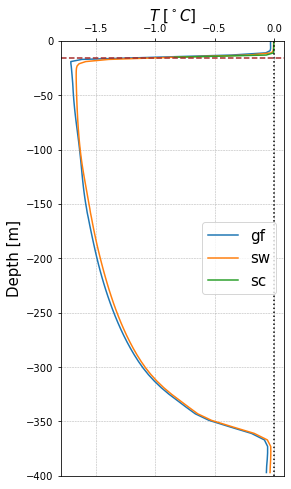

In [22]:
datapath = '/work/oceans/wbao/MITgcm_results/iceplume/4_Sz_minhs'
gf, sw, sc, se = 6, 120, 178, 235 # index for cross-fjord sections 0, 1, sill crest, 2

caseN = 4
t = -1
depth, temp1 = U_zprof(datapath, caseN, t, gf)
depth, temp2 = U_zprof(datapath, caseN, t, sw)
depth, temp3 = U_zprof(datapath, caseN, t, sc)


fig3 = plt.figure(figsize=(4,8))
fig3.tight_layout()  
ax1 = fig3.add_subplot(111)
ax1.plot(temp1-10,depth,'-',lw=1.5,label=r'gf')
ax1.plot(temp2-10,depth,'-',lw=1.5,label=r'sw')
ax1.plot(temp3-10,depth,'-',lw=1.5,label=r'sc')
ax1.axvline(x=0,color='k',linestyle=':')
ax1.axhline(y=-16,color='brown',linestyle='--')

ax1.legend(loc='right',fontsize=15)
ax1.set_xlabel(r'$T\;[^\circ C]$', size = 15)
#ax1.set_xlabel(r'$U\;[m/s]$', size = 15)
#ax1.set_xlabel(r'$Q\;[\times 10^3~m^3/s]$', size = 15)
#ax1.set_xlabel(r'$H\;[\times 10^9~J/s]$', size = 15)

ax1.set_ylabel(r'Depth [m]',size = 15)
#ax4.set_xlim(-4,4)
ax1.set_ylim(-400,0)    
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the top
ax1.grid(ls='--', lw=.5)
